<a href="https://colab.research.google.com/github/sanjana514/Research_Paper/blob/main/Retail_Store_Inventory_Forecasting_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# **Load The dataset**

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "retail_store_inventory.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "anirudhchauhan/retail-store-inventory-forecasting-dataset",
  file_path,
)

print("First 5 records:")
df.head()

First 5 records:


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [ ]:
missing_values = df.isna().sum()
missing_values_percent = 100 * df.isna().sum()/len(df)
print(missing_values_percent)
print(missing_values)

Date                  0.0
Store ID              0.0
Product ID            0.0
Category              0.0
Region                0.0
Inventory Level       0.0
Units Sold            0.0
Units Ordered         0.0
Demand Forecast       0.0
Price                 0.0
Discount              0.0
Weather Condition     0.0
Holiday/Promotion     0.0
Competitor Pricing    0.0
Seasonality           0.0
dtype: float64
Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64


<ipython-input-15-557c9a2e8083>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='viridis')


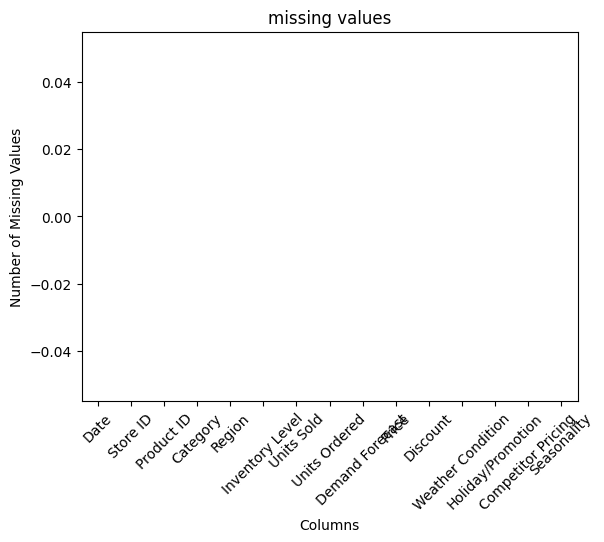

In [ ]:
missing_counts = df.isnull().sum()
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='viridis')
plt.title("missing values")
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

<ipython-input-16-557c9a2e8083>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='viridis')


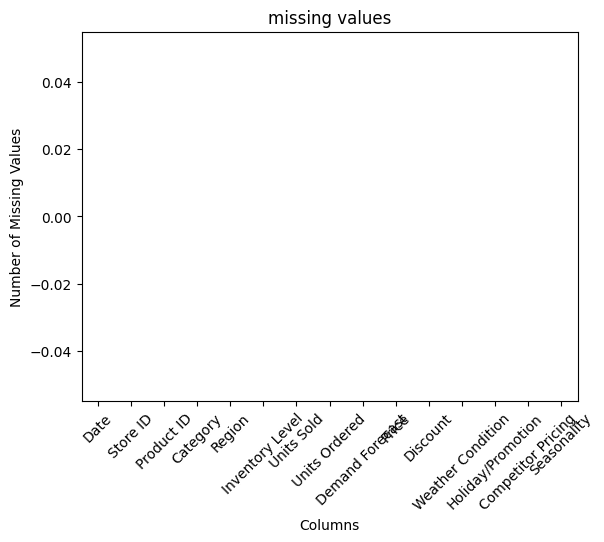

In [ ]:
missing_counts = df.isnull().sum()
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='viridis')
plt.title("missing values")
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

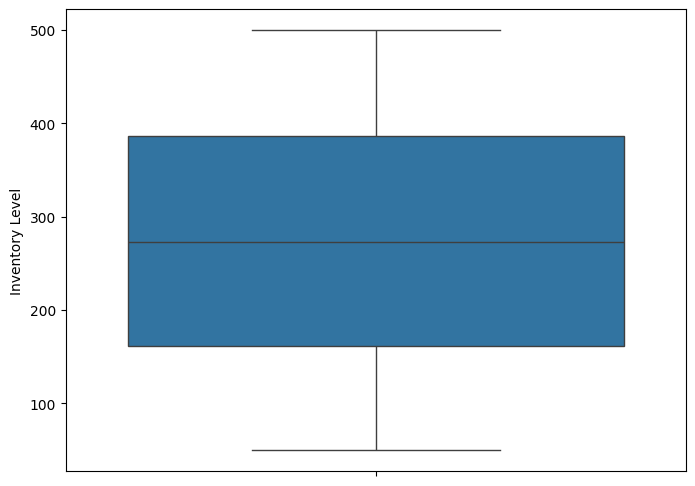

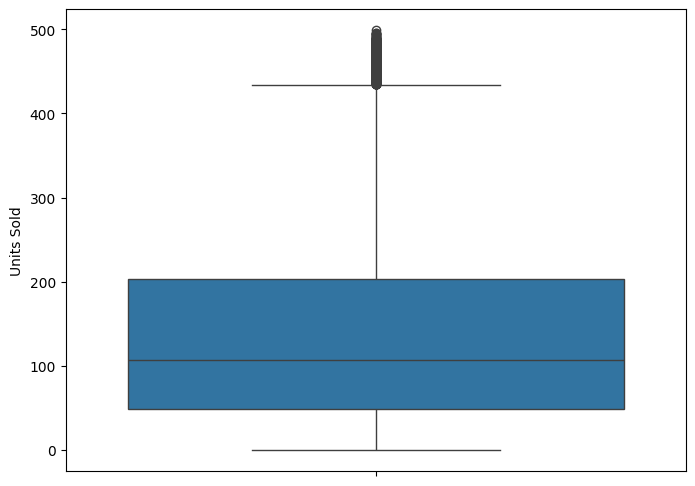

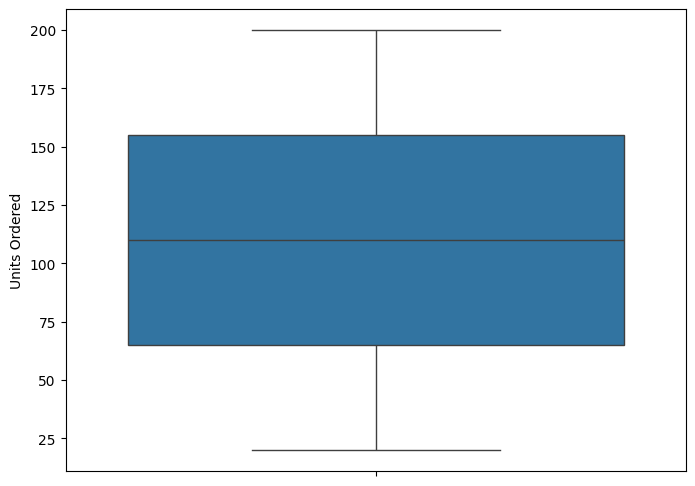

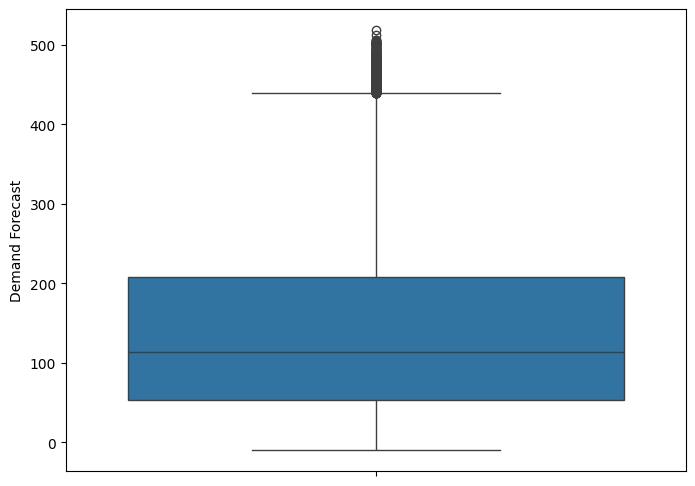

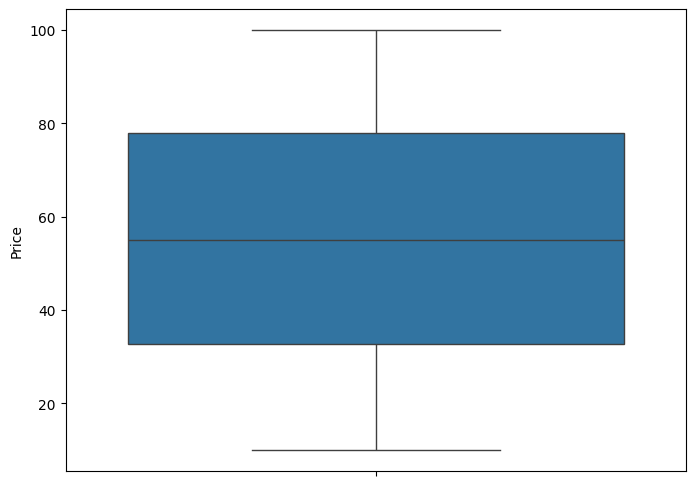

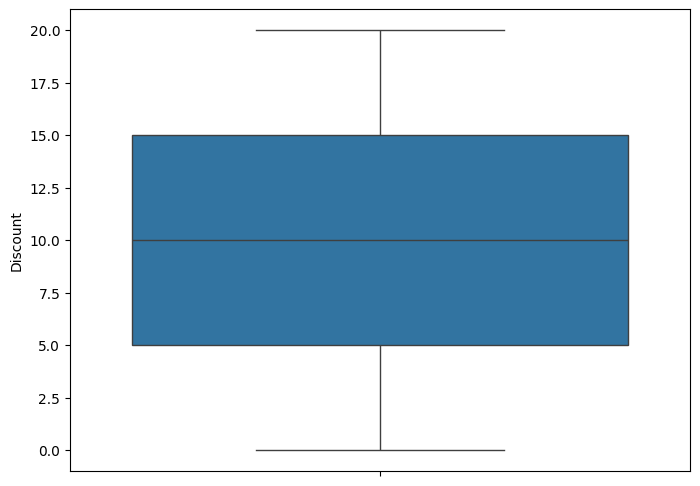

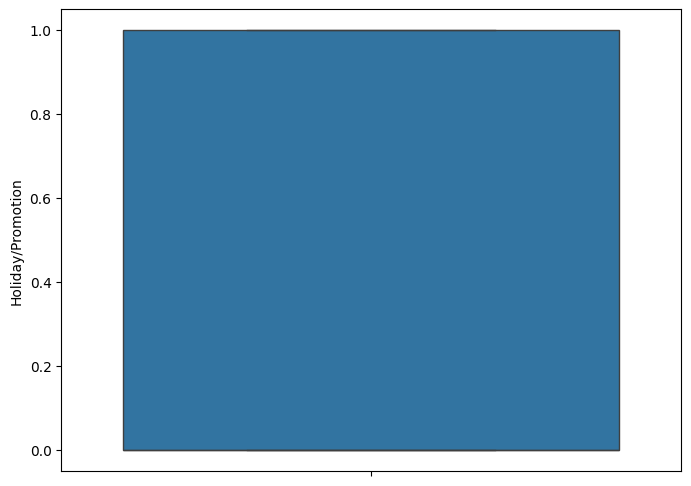

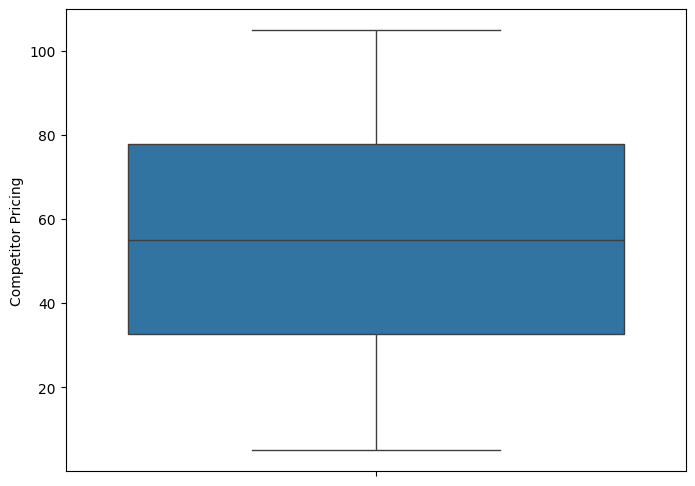

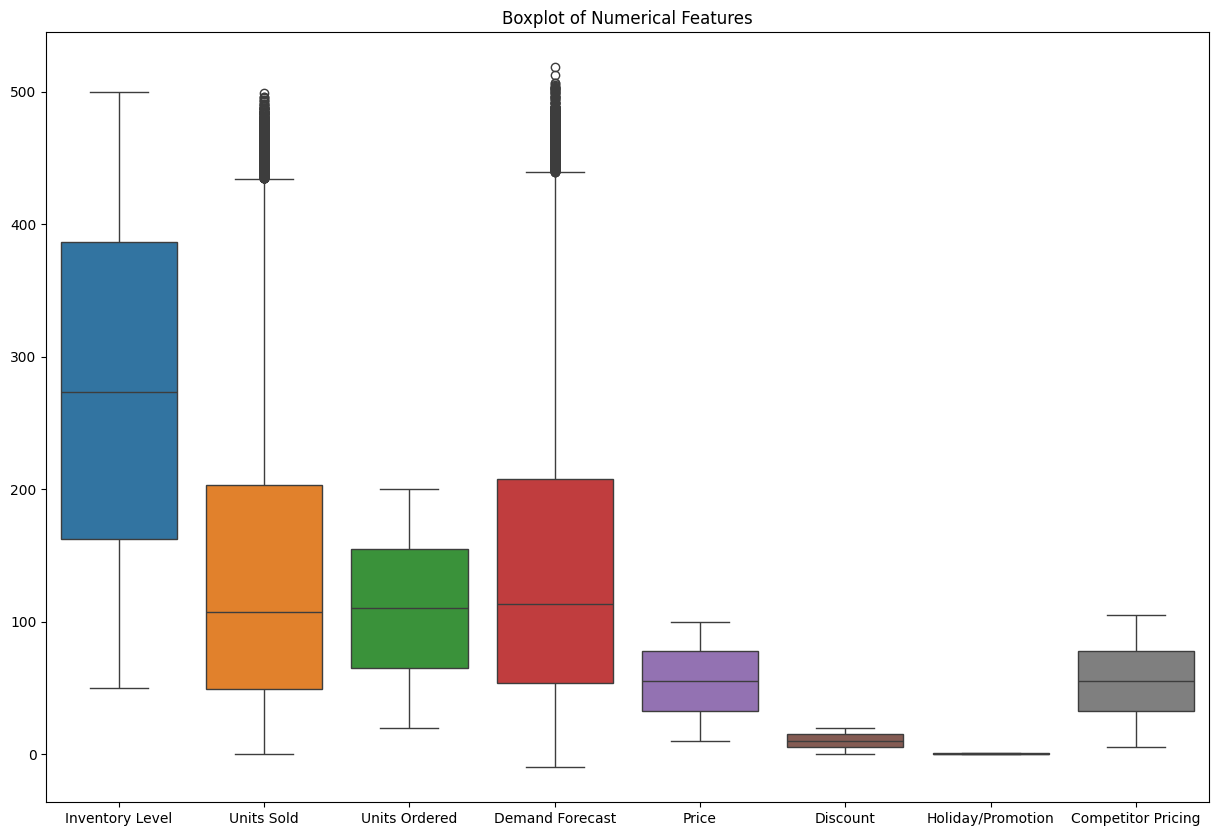

In [ ]:
for column in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[column])
    plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=['int64','float64']))
plt.title('Boxplot of Numerical Features')
plt.show()

         Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1           

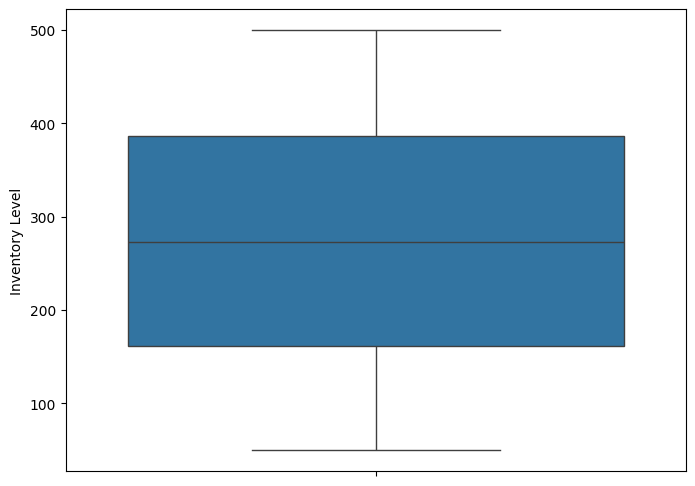

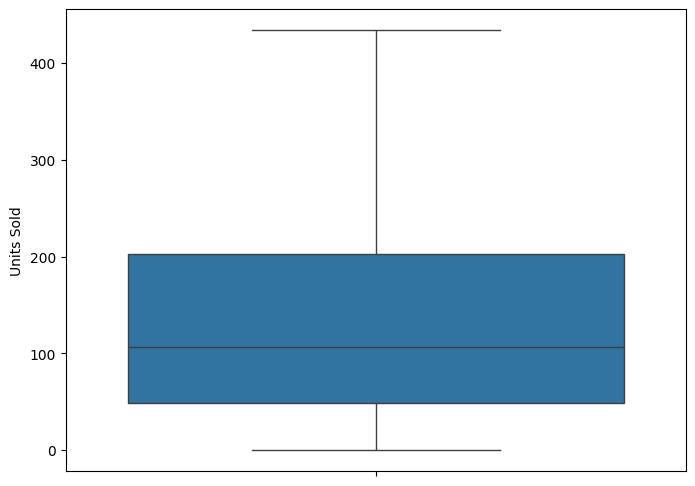

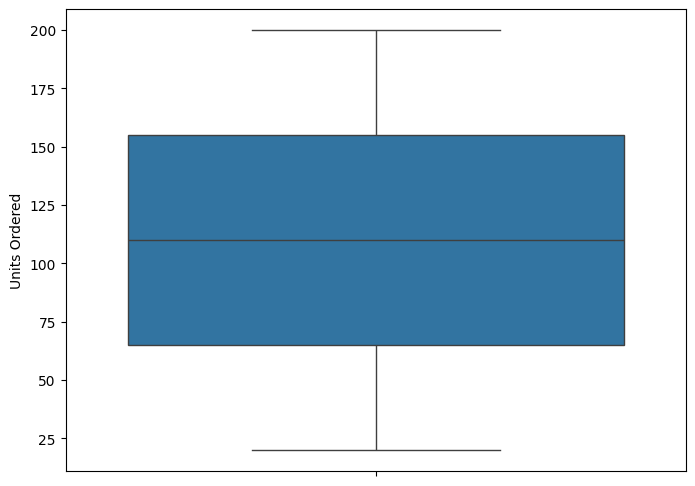

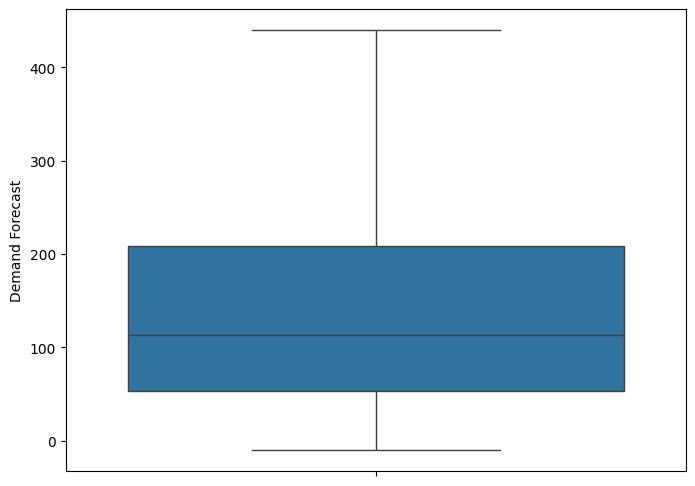

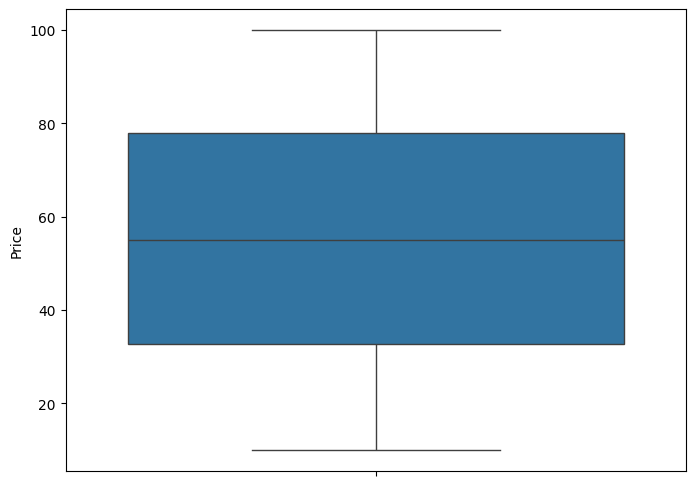

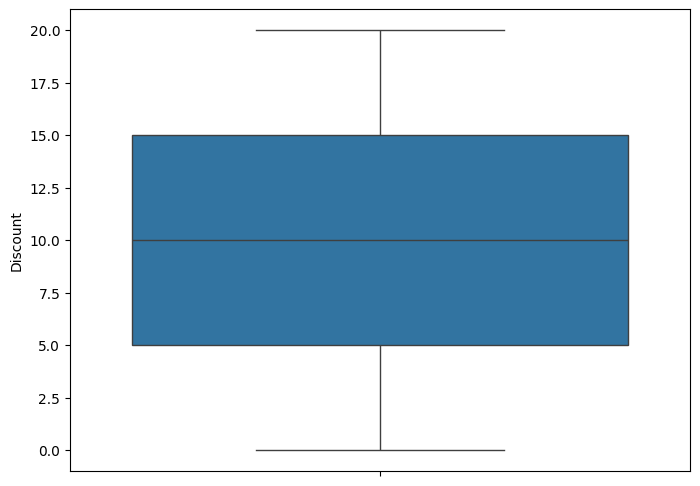

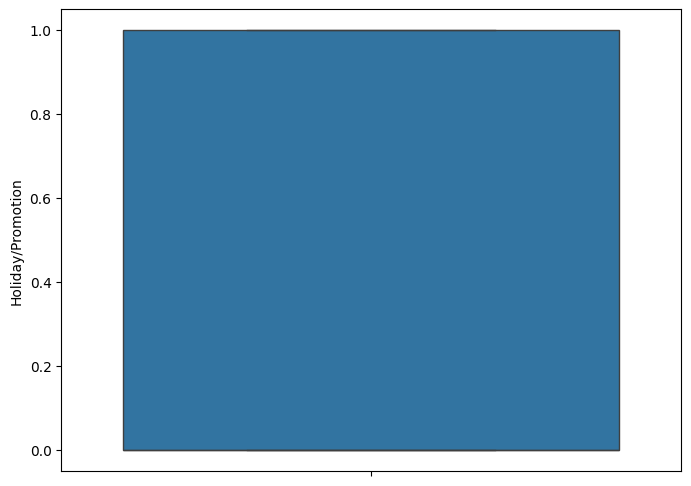

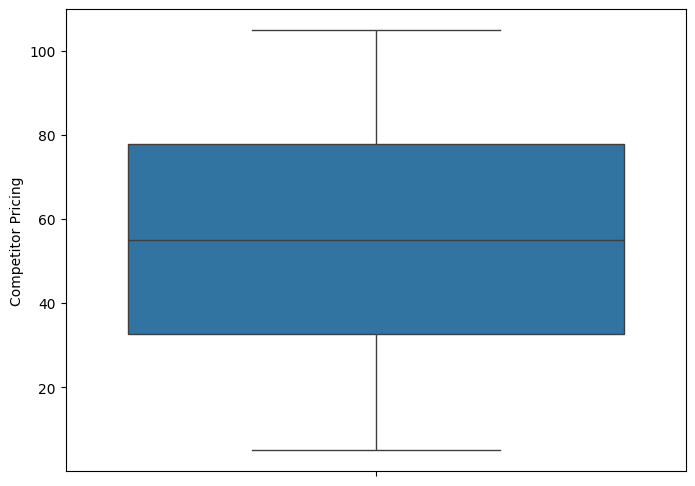

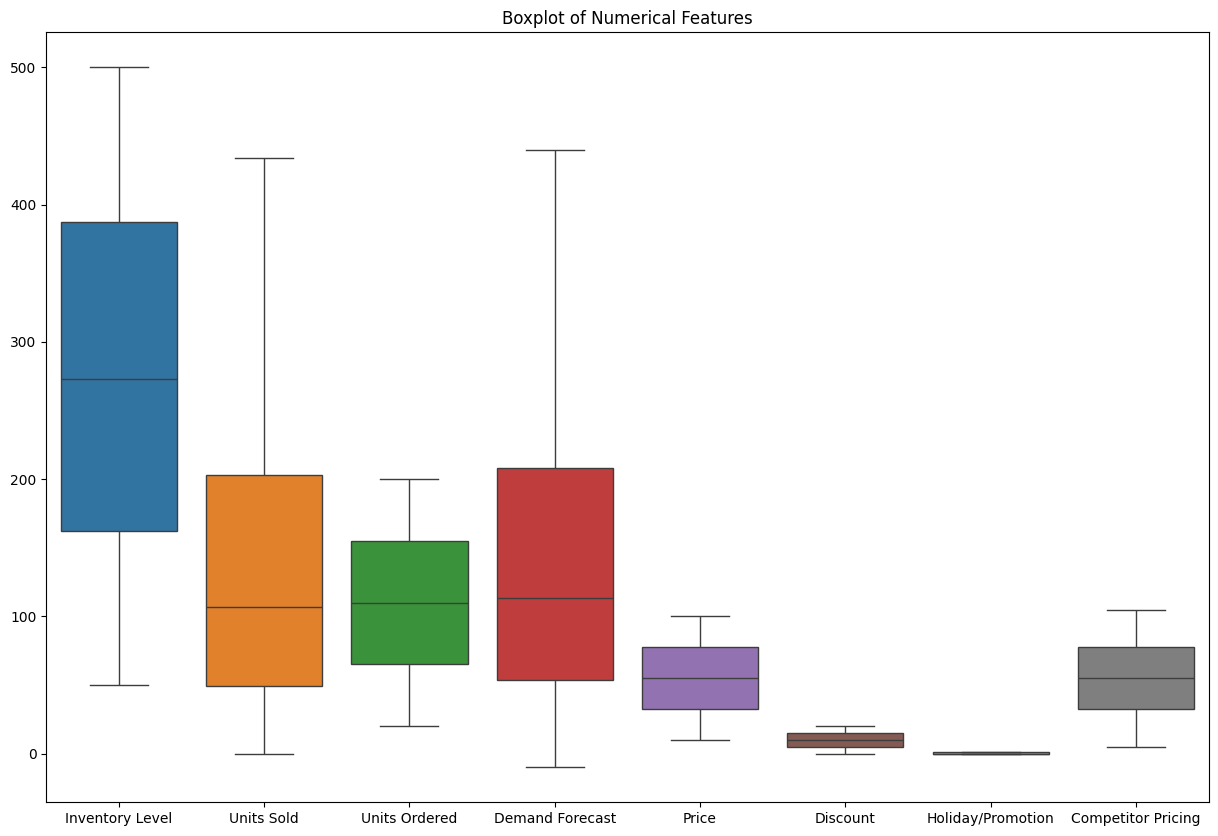

In [ ]:
# Function to cap outliers using IQR (Interquartile Range)
def cap_outliers(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for acceptable values
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values outside the bounds to the lower or upper threshold
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

# List of columns from which to cap outliers
columns_to_cap_outliers = ['Units Sold', 'Demand Forecast']

# Assuming df_rename is your original DataFrame, apply the cap_outliers function
df_capped = cap_outliers(df, columns_to_cap_outliers)

# Display the first few rows of the capped DataFrame
print(df_capped.head())

# Generate individual boxplots for each column after capping outliers
for column in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[column])
    plt.show()

# Generate a combined boxplot for all selected columns after capping outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=['int64','float64']))
plt.title('Boxplot of Numerical Features')
plt.show()


In [ ]:
df_capped

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring


# Hypothesis Testing

## Hypothesis-1
#### Null Hypothesis (H₀): There is no significant correlation between Inventory Level and Units Sold.
#### Alternative Hypothesis (H₁): There is a significant correlation between Inventory Level and Units Sold.
Method : Pearson Correlation

## Hypothesis-2
#### H₀: Higher discounts do not significantly increase Units Sold.
#### H₁: Higher discounts significantly increase Units Sold.
Method : T-Test

## Hypothesis-3
#### H₀: There is no significant increase in Sales during Holiday/Promotion periods.
#### H₁: Sales significantly increase during Holiday/Promotion periods.
Method : T-Test

## Hypothesis-4
#### H₀: Demand Forecast does not significantly differ across different regions.
#### H₁: Demand Forecast significantly differs across different regions.
Method : ANOVA test

## Hypothesis-5
#### H₀: The effect of Competitor Pricing on Units Sold does not vary across Regions.
#### H₁: The effect of Competitor Pricing on Units Sold varies across Regions.
Method : Two-way ANOVA

## Hypothesis-6
#### H₀: Competitor Pricing has no significant impact on the product Price.
#### H₁: Competitor Pricing has a significant impact on the product Price.
Method : Linear Regression

## Hypothesis-7
#### H₀: Units Ordered do not vary significantly across different seasons.
#### H₁: Units Ordered vary significantly across different seasons.
Method : Kruskal-Wallis

## Hypothesis-8
#### H₀: Weather conditions do not affect the number of Units Sold.
#### H₁: Weather conditions significantly affect the number of Units Sold.
Method : Chi-Square Test

## Hypothesis-9
#### H₀: Demand Forecast accuracy does not differ based on Category.
#### H₁: Demand Forecast accuracy differs based on Category.
Method : RMSE Comparison

## Hypothesis-10
#### H₀: Dynamic pricing strategies based on Demand Forecast do not improve revenue.
#### H₁: Dynamic pricing strategies based on Demand Forecast improve revenue.
Method : A/B Testing

## Hypothesis-11
#### H₀: Sales remain constant across different seasons.
#### H₁: Sales vary significantly across seasons.
Method : Time Series Decomposition

## Hypothesis-12
#### H₀: The price of a product does not affect its sales volume.
#### H₁: High-priced products tend to have lower sales volume.
Method : Spearman Rank Correlation

## Hypothesis-13
#### H₀: There is no difference in sales between weekdays and weekends.
#### H₁: Sales increase on weekends.
Method : Wilcoxon Signed-Rank Test

## Hypothesis-14
#### H₀: The distribution of Prices is the same during and outside of Holiday/Promotion periods.
#### H₁: Price distributions differ significantly between Holiday/Promotion and normal days.
Method : Mann-Whitney U Test

## Hypothesis-15
#### H₀: The accuracy of Demand Forecast does not improve over time.
#### H₁: The accuracy of Demand Forecast improves over time.
Method : Mean Absolute Error (MAE)

## Hypothesis-16
#### H₀: Customers in different Regions do not show different Price Sensitivity.
#### H₁: Customers in different Regions have significantly different Price Sensitivity.
Method : Hierarchical Clustering

## Hypothesis-17
#### H₀: Price Elasticity is not significant for product demand.
#### H₁: Price Elasticity significantly affects demand.
Method : Log-Log Regression Model

## Hypothesis-18
#### H₀: Sales variance is equal across different Stores.
#### H₁: Sales variance differs significantly across Stores.
Method : Levene’s Test